# **WATER QUALITY EXPLANATORY DATA ANALYSIS**
---


## **What to expect from this project?**

*   Data Preprocessing (Profiling, Cleaning, Reduction and Transformation)
        [Profiling, Cleaning, Reduction/Filtering, Transformation]
*   Correlation Analysis (Bivariate and multivariate)
        [Check on the relationship of all dimensions]
*   Geospatial (Regional) Analysis
        [Based on water quality and population; List of regional priorities on improving water potability]

## **Context**

Access to safe drinking-water is essential to health, a basic human right and a component of effective policy for health protection. This is important as a health and development issue at a national, regional and local level. In some regions, it has been shown that investments in water supply and sanitation can yield a net economic benefit, since the reductions in adverse health effects and health care costs outweigh the costs of undertaking the interventions.

Drinking water and staying hydrated is associated with a reduced incidence of urinary tract infections (UTIs), lower blood pressure and heart disease. Therefore, drinking water is essential for good heart health.

Water is the most important nutrient for the body. It has many benefits for your health and helps to protect you from illness and disease. Water is also an essential part of a healthy lifestyle.

## **Table of Contents**

1.   Preparation
  11.   Subsection
  12.   Subsection
2.   Data Preprocessing
  21.   Subsection
  22.   Subsection 
3.   Regional Analysis
  31.   Subsection
  32.   Subsection
4.   Conclusion

# **Preparation**
---



### Python Libraries

In [20]:
## This notebook was created in a Google Colab notebook running Python with a handful of pre-installed analytics libraries

import numpy as np # linear algebra
import pandas as pd # dataframe processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualisation
import seaborn as sns # data visualisation
import plotly.express as px # data visualisation
import missingno as msno # identify and visualise missing data

### Group of codes

In [24]:
#@title The Dataframe
df = pd.read_csv("hydrowaste.csv") # Read a csv file as a Pandas DataFrame and assign it to a variable called df
df.head() # print is not required for outputs in this Jupyter Notebook

,WASTE_ID,SOURCE,ORG_ID,WWTP_NAME,COUNTRY,CNTRY_ISO,LATITUDE,LONGITUDE,QUAL_LOC,LAT_OUT,...,QUAL_WASTE,LEVEL,QUAL_LEVEL,DF,HYRIV_ID,RIVER_DIS,COAST_10KM,COAST_50KM,DESIGN_CAP,QUAL_CAP
0,2248,1,1279514,Strzyzow,Ukraine,UKR,50.841,24.031,2,50.840,...,1,Secondary,1,36188011.51,20352809,40.163,0,0,2500.0,2
1,56448,12,3598,NaN,Ukraine,UKR,44.396,33.977,1,44.390,...,4,Secondary,2,NaN,20516712,NaN,1,1,NaN,3
2,56449,12,3599,NaN,Ukraine,UKR,44.410,34.021,1,44.390,...,4,Secondary,2,NaN,20516712,NaN,1,1,NaN,3
3,56450,12,3600,NaN,Ukraine,UKR,44.440,33.724,1,44.494,...,4,Secondary,2,119.86,20514644,2.856,0,1,NaN,3
4,56452,12,3602,NaN,Ukraine,UKR,44.477,33.789,1,44.494,...,4,Secondary,2,101.92,20514644,2.856,0,1,NaN,3


In [26]:
#@title 
df.len()

AttributeError: ignored

### Missing Values

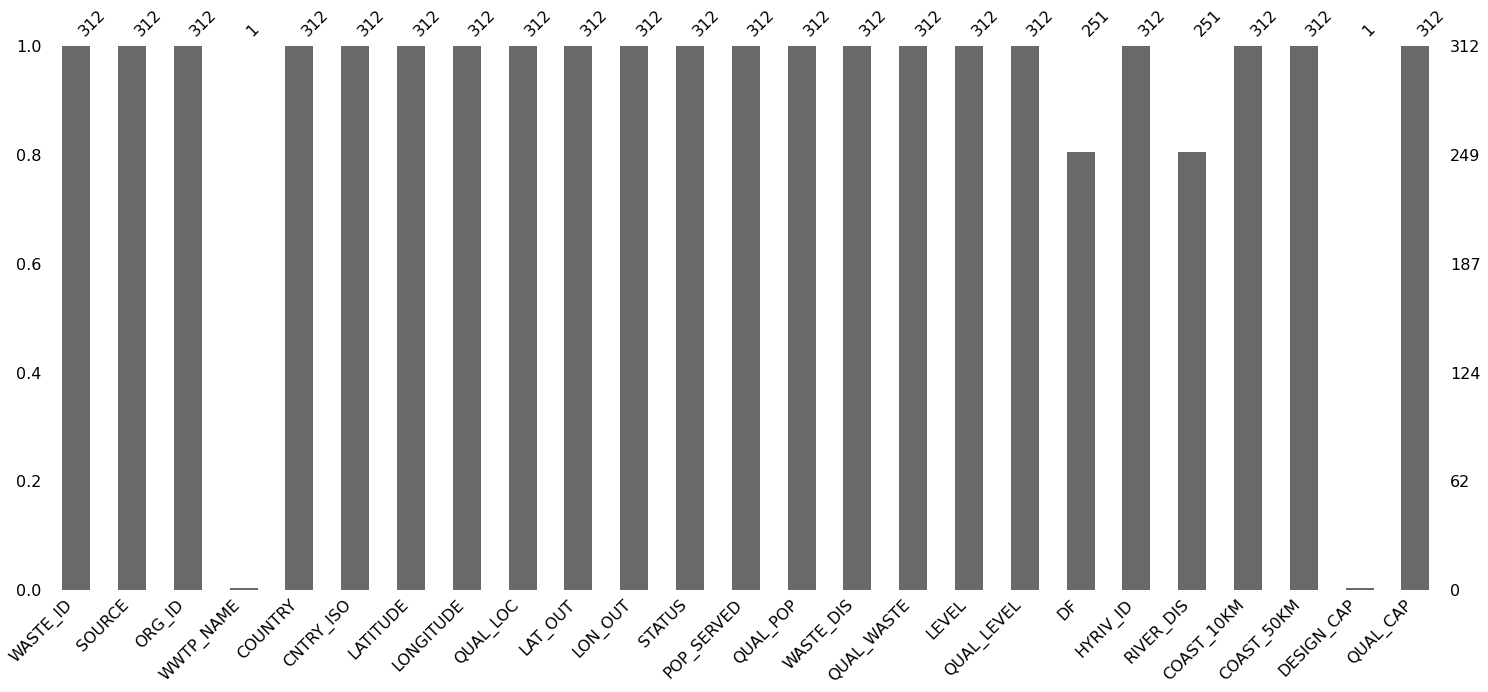

In [36]:
#@title Bar Chart
## Checking correlations in missing data
### [Explanation]
msno.bar(df)

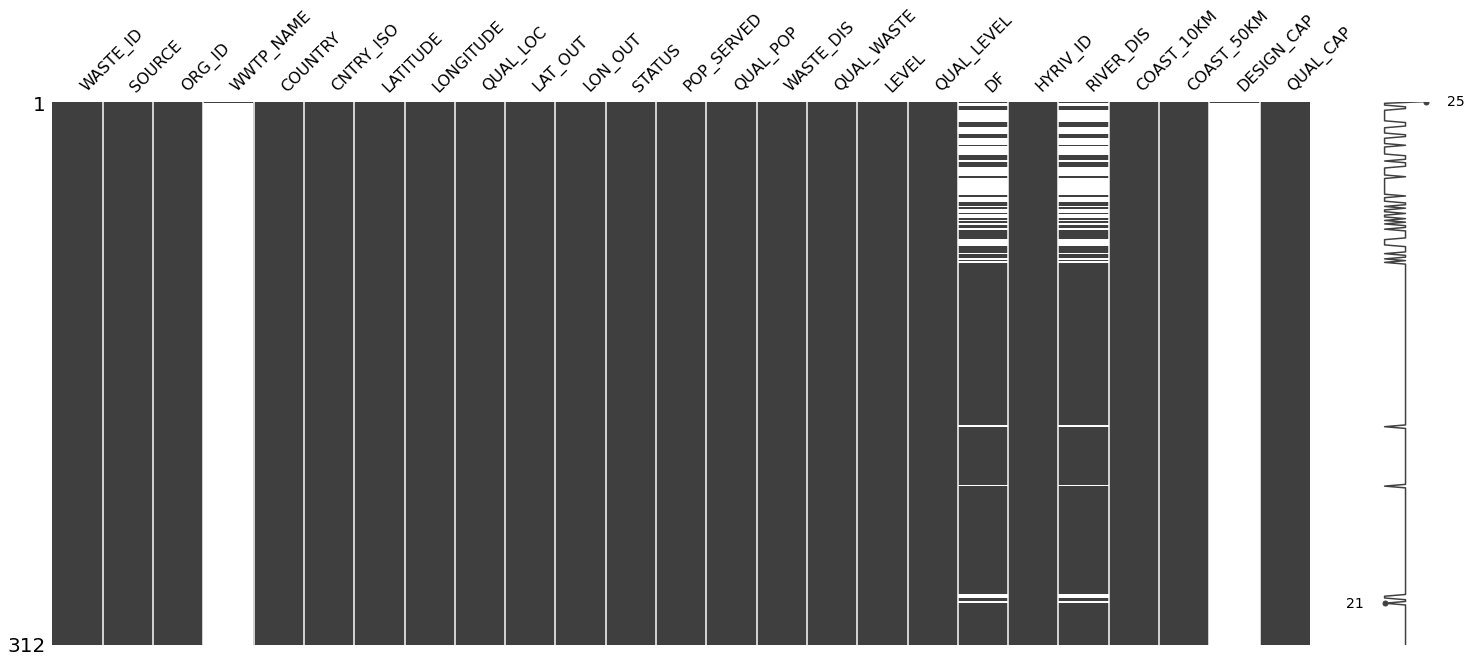

In [28]:
#@title Matrix Chart
## Visualising missing data
### When data is present, the plot is shaded in grey, and when it is absent the plot is displayed in white.
msno.matrix(df)

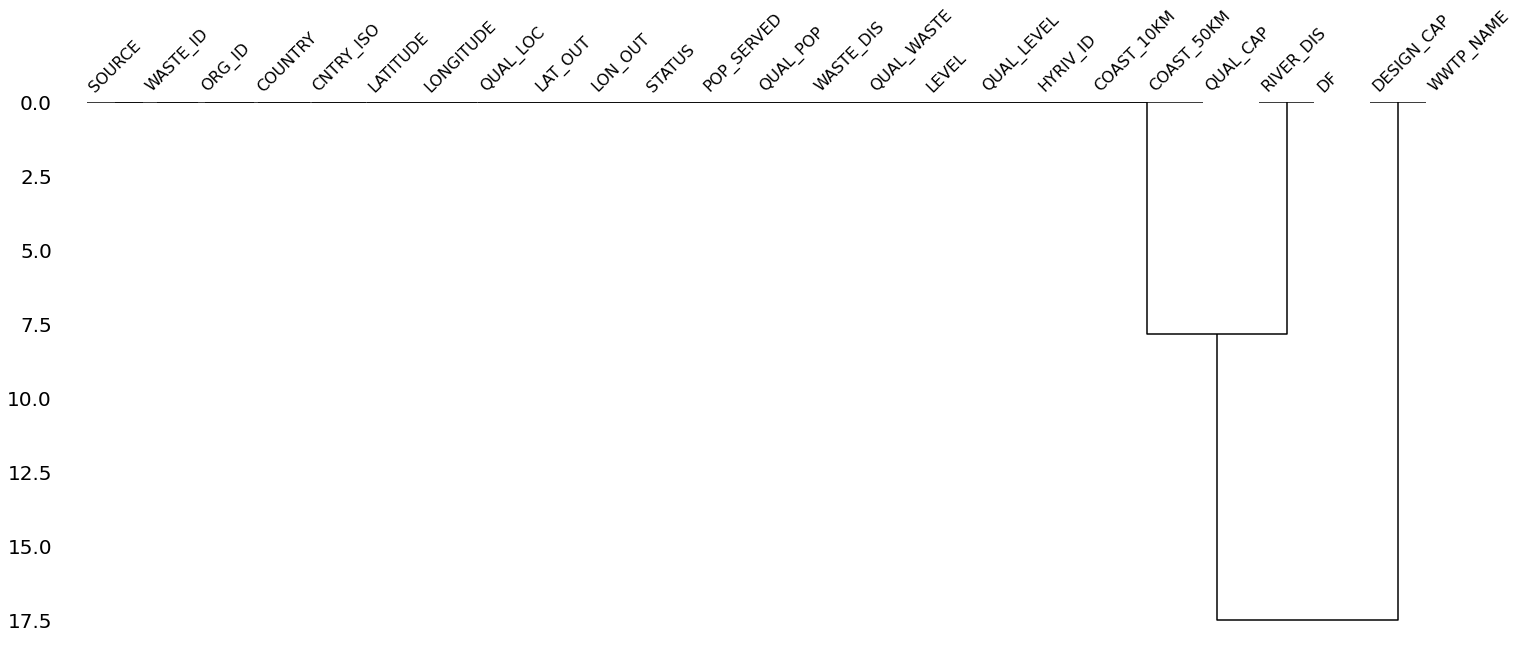

In [40]:
#@title Dendrogram Chart
## Grouping together columns that have strong correlations in nullity
### The closer the columns are in the three, the more likely their null values occur in the same row (and vice-versa).
msno.dendrogram(df)

In [30]:
#@title Count of missing values per column
df.isnull().sum()

WASTE_ID        0
SOURCE          0
ORG_ID          0
WWTP_NAME     311
COUNTRY         0
CNTRY_ISO       0
LATITUDE        0
LONGITUDE       0
QUAL_LOC        0
LAT_OUT         0
LON_OUT         0
STATUS          0
POP_SERVED      0
QUAL_POP        0
WASTE_DIS       0
QUAL_WASTE      0
LEVEL           0
QUAL_LEVEL      0
DF             61
HYRIV_ID        0
RIVER_DIS      61
COAST_10KM      0
COAST_50KM      0
DESIGN_CAP    311
QUAL_CAP        0
dtype: int64

# **Exploration**
---




### Summary Statistics

In [21]:
df.describe()

,WASTE_ID,SOURCE,ORG_ID,LATITUDE,LONGITUDE,QUAL_LOC,LAT_OUT,LON_OUT,POP_SERVED,QUAL_POP,WASTE_DIS,QUAL_WASTE,QUAL_LEVEL,DF,HYRIV_ID,RIVER_DIS,COAST_10KM,COAST_50KM,DESIGN_CAP,QUAL_CAP
count,312.000000,312.000000,3.120000e+02,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,2.510000e+02,3.120000e+02,251.000000,312.000000,312.000000,1.0,312.000000
mean,56552.035256,11.964744,7.965228e+03,48.436282,32.639359,1.003205,48.429022,32.643567,58978.756410,3.993590,4907.924429,3.990385,1.996795,1.623563e+05,2.041507e+07,169.591992,0.195513,0.371795,2500.0,2.996795
std,3087.350125,0.622752,7.221888e+04,1.875589,4.392967,0.056614,1.877494,4.387353,99288.113629,0.113228,8262.338956,0.169842,0.056614,2.284632e+06,4.900925e+04,697.016959,0.397232,0.484060,NaN,0.056614
min,2248.000000,1.000000,3.598000e+03,44.396000,22.247000,1.000000,44.390000,22.148000,86.000000,2.000000,0.096000,1.000000,1.000000,2.344000e+00,2.032617e+07,0.072000,0.000000,0.000000,2500.0,2.000000
25%,56631.750000,12.000000,3.784500e+03,47.485250,30.317750,1.000000,47.517750,30.310500,9672.500000,4.000000,804.939500,4.000000,2.000000,4.591700e+01,2.037663e+07,0.976000,0.000000,0.000000,2500.0,3.000000
50%,56741.500000,12.000000,3.892500e+03,48.629000,33.558000,1.000000,48.614500,33.587500,23400.500000,4.000000,1947.280000,4.000000,2.000000,1.847000e+02,2.040854e+07,3.744000,0.000000,0.000000,2500.0,3.000000
75%,56830.250000,12.000000,3.981500e+03,49.912000,36.063500,1.000000,49.877250,36.056000,62626.000000,4.000000,5211.444500,4.000000,2.000000,1.001125e+03,2.044076e+07,30.397000,0.000000,1.000000,2500.0,3.000000
max,57032.000000,12.000000,1.279514e+06,51.864000,40.122000,2.000000,51.906000,40.027000,719465.000000,4.000000,59870.713000,4.000000,2.000000,3.618801e+07,2.051671e+07,6761.125000,1.000000,1.000000,2500.0,3.000000


### Second Insight

# **Geospatial Analysis**
---




### First Insight

### Second Insight

# **Conclusion**
---




1.   Idea 1
2.   Idea 2

# **NOTES**
---



### **Cool Usable Codes**



*   ***Seaborn Pair Plot with Hue*** (Multivariate Analysis; Multi plot charts)
        sns.pairplot (data = dataframe, hue = 'column1')
*   ***Missingno Matrix Plot***(Show missing data in the dataframe)
        When data is present, the plot is shaded in grey, and when it is absent the plot is displayed in white.
        msno.matrix (dataframe)
*   List item
        Insert code


### Links To Go Back Later

*   [Distribution and characteristics of wastewater treatment plants within the global river network](https://essd.copernicus.org/articles/14/559/2022/)
*   [Using the missingno Python library to Identify and Visualise Missing Data Prior to Machine Learning](https://towardsdatascience.com/using-the-missingno-python-library-to-identify-and-visualise-missing-data-prior-to-machine-learning-34c8c5b5f009)
*   [Python Jupyter - Insight to Univariate and Multivariate Distribution Plots](https://www.youtube.com/watch?v=vssXHSLSGL4&ab_channel=NomanArshed)
*   [Univariate, Bivariate, and Multivariate Data Analysis in Python](https://medium.com/mlearning-ai/univariate-bivariate-and-multivariate-data-analysis-in-python-341493c3d173#:~:text=Multivariate%20analysis%20is%20a%20more,plot%2C%20with%20Hue%20as%20Approved.)
*   List item




